In [1]:
import pandas as pd

## Group by - Basic

In [2]:
# data_from
ipl_data={
    "Team": [
        "Riders",
        "Riders",
        "Devils",
        "Devils",
        "Kings",
        "Kings",
        "Kings",
        "Kings",
        "Riders",
        "Royals",
        "Royals",
        "Riders"
    ],
    "Rank": [1,2,2,3,3,4,1,1,2,4,1,2],
    "Year": [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
    "Points": [876, 789, 863, 673, 741, 812, 756, 788, 694, 701, 804, 690]
}

df = pd.DataFrame(ipl_data)

df

In [3]:
df.groupby("Team")["Points"].sum()

Team
Devils    1536
Kings     3097
Riders    3049
Royals    1505
Name: Points, dtype: int64

## Hierarchical index

In [4]:
h_index = df.groupby(["Team", "Year"])["Points"].sum()
h_index

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2015    812
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
Name: Points, dtype: int64

In [5]:
h_index.index

MultiIndex([('Devils', 2014),
            ('Devils', 2015),
            ( 'Kings', 2014),
            ( 'Kings', 2015),
            ( 'Kings', 2016),
            ( 'Kings', 2017),
            ('Riders', 2014),
            ('Riders', 2015),
            ('Riders', 2016),
            ('Riders', 2017),
            ('Royals', 2014),
            ('Royals', 2015)],
           names=['Team', 'Year'])

In [6]:
h_index.unstack()

Year,2014,2015,2016,2017
Team,,,,
Devils,863.0,673.0,NaN,NaN
Kings,741.0,812.0,756.0,788.0
Riders,876.0,789.0,694.0,690.0
Royals,701.0,804.0,NaN,NaN


In [7]:
h_index

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2015    812
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
Name: Points, dtype: int64

In [8]:
h_index.reset_index()

,Team,Year,Points
0,Devils,2014,863
1,Devils,2015,673
2,Kings,2014,741
3,Kings,2015,812
4,Kings,2016,756
5,Kings,2017,788
6,Riders,2014,876
7,Riders,2015,789
8,Riders,2016,694
9,Riders,2017,690


In [9]:
h_index.swaplevel()

Year  Team  
2014  Devils    863
2015  Devils    673
2014  Kings     741
2015  Kings     812
2016  Kings     756
2017  Kings     788
2014  Riders    876
2015  Riders    789
2016  Riders    694
2017  Riders    690
2014  Royals    701
2015  Royals    804
Name: Points, dtype: int64

In [10]:
 h_index

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2015    812
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
Name: Points, dtype: int64

In [11]:
h_index.sort_index(level=1)

Team    Year
Devils  2014    863
Kings   2014    741
Riders  2014    876
Royals  2014    701
Devils  2015    673
Kings   2015    812
Riders  2015    789
Royals  2015    804
Kings   2016    756
Riders  2016    694
Kings   2017    788
Riders  2017    690
Name: Points, dtype: int64

## Groupby - grouped

In [12]:
grouped = df.groupby("Team")

In [13]:
for name, group in grouped:
    print(name)
    print(group)

Devils
     Team  Rank  Year  Points
2  Devils     2  2014     863
3  Devils     3  2015     673
Kings
    Team  Rank  Year  Points
4  Kings     3  2014     741
5  Kings     4  2015     812
6  Kings     1  2016     756
7  Kings     1  2017     788
Riders
      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
8   Riders     2  2016     694
11  Riders     2  2017     690
Royals
      Team  Rank  Year  Points
9   Royals     4  2014     701
10  Royals     1  2015     804


In [14]:
grouped.get_group("Devils")

,Team,Rank,Year,Points
2,Devils,2,2014,863
3,Devils,3,2015,673


## Aggregation

In [15]:
grouped.agg(max)

,Rank,Year,Points
Team,,,
Devils,3,2015,863
Kings,4,2017,812
Riders,2,2017,876
Royals,4,2015,804


In [16]:
import numpy as np

grouped.agg(np.mean)

,Rank,Year,Points
Team,,,
Devils,2.50,2014.5,768.00
Kings,2.25,2015.5,774.25
Riders,1.75,2015.5,762.25
Royals,2.50,2014.5,752.50


In [17]:
grouped.describe().T

Team               Devils        Kings       Riders       Royals
Rank   count     2.000000     4.000000     4.000000     2.000000
       mean      2.500000     2.250000     1.750000     2.500000
       std       0.707107     1.500000     0.500000     2.121320
       min       2.000000     1.000000     1.000000     1.000000
       25%       2.250000     1.000000     1.750000     1.750000
       50%       2.500000     2.000000     2.000000     2.500000
       75%       2.750000     3.250000     2.000000     3.250000
       max       3.000000     4.000000     2.000000     4.000000
Year   count     2.000000     4.000000     4.000000     2.000000
       mean   2014.500000  2015.500000  2015.500000  2014.500000
       std       0.707107     1.290994     1.290994     0.707107
       min    2014.000000  2014.000000  2014.000000  2014.000000
       25%    2014.250000  2014.750000  2014.750000  2014.250000
       50%    2014.500000  2015.500000  2015.500000  2014.500000
       75%    2014.750000  2016.250000  2016.250000  2014.750000
       max    2015.000000  2017.000000  2017.000000  2015.000000
Points count     2.000000     4.000000     4.000000     2.000000
       mean    768.000000   774.250000   762.250000   752.500000
       std     134.350288    31.899582    88.567771    72.831998
       min     673.000000   741.000000   690.000000   701.000000
       25%     720.500000   752.250000   693.000000   726.750000
       50%     768.000000   772.000000   741.500000   752.500000
       75%     815.500000   794.000000   810.750000   778.250000
       max     863.000000   812.000000   876.000000   804.000000

## Transformation

In [18]:
score = lambda x: (x - x.mean()) / x.std()
grouped.transform(score)

,Rank,Year,Points
0,-1.500000,-1.161895,1.284327
1,0.500000,-0.387298,0.302029
2,-0.707107,-0.707107,0.707107
3,0.707107,0.707107,-0.707107
4,0.500000,-1.161895,-1.042333
5,1.166667,-0.387298,1.183401
6,-0.833333,0.387298,-0.572108
7,-0.833333,1.161895,0.431040
8,0.500000,0.387298,-0.770596
9,0.707107,-0.707107,-0.707107


## Filtration

In [19]:
df.groupby("Team").filter(lambda x: len(x) >= 3)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
11,Riders,2,2017,690


In [20]:
df.groupby("Team").filter(lambda x: x["Points"].mean() > 760)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
11,Riders,2,2017,690


# Case study

In [21]:
import dateutil

df_phone = pd.read_csv("../data/phone_data.csv")
df_phone['date'] = df_phone['date'].apply(dateutil.parser.parse, dayfirst=True)

In [22]:
df_phone.groupby('month')['duration'].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [23]:
df_phone

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,2015-03-13 00:38:00,1.000,sms,2015-03,world,world
826,826,2015-03-13 00:39:00,1.000,sms,2015-03,Vodafone,mobile
827,827,2015-03-13 06:58:00,34.429,data,2015-03,data,data
828,828,2015-03-14 00:13:00,1.000,sms,2015-03,world,world


In [24]:
df_phone[df_phone['item']=='call'].groupby('network')['duration'].sum()

network
Meteor        7200.0
Tesco        13828.0
Three        36464.0
Vodafone     14621.0
landline     18433.0
voicemail     1775.0
Name: duration, dtype: float64

In [25]:
df_phone.groupby(['month','item'])['date'].count()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: date, dtype: int64

In [26]:
df_phone.groupby(['month', 'item'])['date'].count().unstack()

item,call,data,sms
month,,,
2014-11,107,29,94
2014-12,79,30,48
2015-01,88,31,86
2015-02,67,31,39
2015-03,47,29,25


In [27]:
df_phone.groupby('month', as_index=False).agg({"duration": "sum"})

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [28]:
df_phone.groupby(['month','item']).agg({'duration': sum, 
                                         'network_type': 'count',
                                        'date': 'first'})

duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
        sms      48.000            48 2014-11-14 17:28:00
2015-01 call  17070.000            88 2014-12-15 20:03:00
        data   1067.299            31 2014-12-13 06:58:00
        sms      86.000            86 2014-12-15 19:56:00
2015-02 call  14416.000            67 2015-01-15 10:36:00
        data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-02-12 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

In [29]:
df_phone.groupby(['month', 'item']).agg({'duration': [min, max, sum],
                                        'network_type': 'count',
                                        'date': [min, 'first', 'nunique']})

duration                       network_type                date  \
                  min        max        sum        count                 min   
month   item                                                                   
2014-11 call    1.000   1940.000  25547.000          107 2014-10-15 06:58:00   
        data   34.429     34.429    998.441           29 2014-10-15 06:58:00   
        sms     1.000      1.000     94.000           94 2014-10-16 22:18:00   
2014-12 call    2.000   2120.000  13561.000           79 2014-11-14 17:24:00   
        data   34.429     34.429   1032.870           30 2014-11-13 06:58:00   
        sms     1.000      1.000     48.000           48 2014-11-14 17:28:00   
2015-01 call    2.000   1859.000  17070.000           88 2014-12-15 20:03:00   
        data   34.429     34.429   1067.299           31 2014-12-13 06:58:00   
        sms     1.000      1.000     86.000           86 2014-12-15 19:56:00   
2015-02 call    1.000   1863.000  14416.000           67 2015-01-15 10:36:00   
        data   34.429     34.429   1067.299           31 2015-01-13 06:58:00   
        sms     1.000      1.000     39.000           39 2015-01-15 12:23:00   
2015-03 call    2.000  10528.000  21727.000           47 2015-02-12 20:15:00   
        data   34.429     34.429    998.441           29 2015-02-13 06:58:00   
        sms     1.000      1.000     25.000           25 2015-02-19 18:46:00   

                                          
                           first nunique  
month   item                              
2014-11 call 2014-10-15 06:58:00     104  
        data 2014-10-15 06:58:00      29  
        sms  2014-10-16 22:18:00      79  
2014-12 call 2014-11-14 17:24:00      76  
        data 2014-11-13 06:58:00      30  
        sms  2014-11-14 17:28:00      41  
2015-01 call 2014-12-15 20:03:00      84  
        data 2014-12-13 06:58:00      31  
        sms  2014-12-15 19:56:00      58  
2015-02 call 2015-01-15 10:36:00      67  
        data 2015-01-13 06:58:00      31  
        sms  2015-01-15 12:23:00      27  
2015-03 call 2015-02-12 20:15:00      47  
        data 2015-02-13 06:58:00      29  
        sms  2015-02-19 18:46:00      17

<AxesSubplot:xlabel='month'>

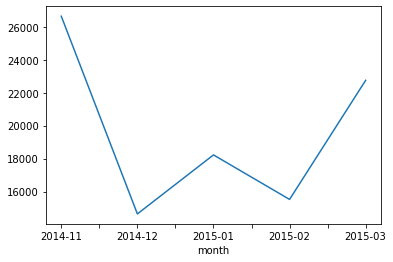

In [30]:
import matplotlib

df_phone.groupby("month")["duration"].sum().plot()

In [32]:
grouped = df_phone.groupby("month").agg({"duration": [min, max, np.mean]})
grouped

duration                     
             min      max        mean
month                                
2014-11      1.0   1940.0  115.823657
2014-12      1.0   2120.0   93.260318
2015-01      1.0   1859.0   88.894141
2015-02      1.0   1863.0  113.301453
2015-03      1.0  10528.0  225.251891

In [33]:
grouped_columns = grouped.columns.droplevel(level=0)

In [34]:
grouped_columns

Index(['min', 'max', 'mean'], dtype='object')

In [35]:
grouped.add_prefix("duration_")

duration_duration                           
             duration_min duration_max duration_mean
month                                               
2014-11               1.0       1940.0    115.823657
2014-12               1.0       2120.0     93.260318
2015-01               1.0       1859.0     88.894141
2015-02               1.0       1863.0    113.301453
2015-03               1.0      10528.0    225.251891

## Pivot Table

In [36]:
df_phone

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,2015-03-13 00:38:00,1.000,sms,2015-03,world,world
826,826,2015-03-13 00:39:00,1.000,sms,2015-03,Vodafone,mobile
827,827,2015-03-13 06:58:00,34.429,data,2015-03,data,data
828,828,2015-03-14 00:13:00,1.000,sms,2015-03,world,world


In [38]:
df_phone.pivot_table(
    values=["duration"],
    index=[df_phone.month, df_phone.item],
    columns=df_phone.network,
    aggfunc="sum",
    fill_value=0,
)

duration                                                   \
network        Meteor Tesco  Three Vodafone      data landline special   
month   item                                                             
2014-11 call     1521  4045  12458     4316     0.000     2906       0   
        data        0     0      0        0   998.441        0       0   
        sms        10     3     25       55     0.000        0       1   
2014-12 call     2010  1819   6316     1302     0.000     1424       0   
        data        0     0      0        0  1032.870        0       0   
        sms        12     1     13       18     0.000        0       0   
2015-01 call     2207  2904   6445     3626     0.000     1603       0   
        data        0     0      0        0  1067.299        0       0   
        sms        10     3     33       40     0.000        0       0   
2015-02 call     1188  4087   6279     1864     0.000      730       0   
        data        0     0      0        0  1067.299        0       0   
        sms         1     2     11       23     0.000        0       2   
2015-03 call      274   973   4966     3513     0.000    11770       0   
        data        0     0      0        0   998.441        0       0   
        sms         0     4      5       13     0.000        0       0   

                              
network      voicemail world  
month   item                  
2014-11 call       301     0  
        data         0     0  
        sms          0     0  
2014-12 call       690     0  
        data         0     0  
        sms          0     4  
2015-01 call       285     0  
        data         0     0  
        sms          0     0  
2015-02 call       268     0  
        data         0     0  
        sms          0     0  
2015-03 call       231     0  
        data         0     0  
        sms          0     3

## Merge

In [39]:
import pandas as pd

In [41]:
raw_data = {
    "subject_id": ["1","2","3","4","5","7","8","9","10","11"],
    "test_score": [51,15,15,61,16,14,15,1,61,16]
}
df_a = pd.DataFrame(raw_data, columns=["subject_id", "test_score"])
df_a

,subject_id,test_score
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [42]:
raw_data = {
    "subject_id": ["4","5","6","7","8"],
    "first_name": ["Billy","Brian","Bran","Bryce","Betty"],
    "last_name": ["Bonder","Black","Balwner","Brice","Btisan"]
}
df_b = pd.DataFrame(raw_data, columns=["subject_id", "first_name", "last_name"])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [43]:
pd.merge(df_a, df_b, on="subject_id")

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


In [44]:
pd.merge(df_a, df_b, left_on="subject_id", right_on="subject_id")

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


In [45]:
pd.merge(df_a, df_b, on="subject_id", how="left")

,subject_id,test_score,first_name,last_name
0,1,51,NaN,NaN
1,2,15,NaN,NaN
2,3,15,NaN,NaN
3,4,61,Billy,Bonder
4,5,16,Brian,Black
5,7,14,Bryce,Brice
6,8,15,Betty,Btisan
7,9,1,NaN,NaN
8,10,61,NaN,NaN
9,11,16,NaN,NaN


In [46]:
pd.merge(df_a, df_b, on="subject_id", how="right")

,subject_id,test_score,first_name,last_name
0,4,61.0,Billy,Bonder
1,5,16.0,Brian,Black
2,6,NaN,Bran,Balwner
3,7,14.0,Bryce,Brice
4,8,15.0,Betty,Btisan


In [47]:
pd.merge(df_a, df_b, on="subject_id", how="outer")

,subject_id,test_score,first_name,last_name
0,1,51.0,NaN,NaN
1,2,15.0,NaN,NaN
2,3,15.0,NaN,NaN
3,4,61.0,Billy,Bonder
4,5,16.0,Brian,Black
5,7,14.0,Bryce,Brice
6,8,15.0,Betty,Btisan
7,9,1.0,NaN,NaN
8,10,61.0,NaN,NaN
9,11,16.0,NaN,NaN


In [48]:
pd.merge(df_a, df_b, on="subject_id", how="inner")

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


In [49]:
pd.merge(df_a, df_b, right_index=True, left_index=True)

,subject_id_x,test_score,subject_id_y,first_name,last_name
0,1,51,4,Billy,Bonder
1,2,15,5,Brian,Black
2,3,15,6,Bran,Balwner
3,4,61,7,Bryce,Brice
4,5,16,8,Betty,Btisan


## Concat

In [50]:
raw_data = {
    "subject_id": ["1","2","3","4","5"],
    "first_name": ["Alex","Amy","Allen","Alice","Ayoung"],
    "last_name": ["Anderson","Ackerman","Ali","Aoni","Atiches"]
}
df_a = pd.DataFrame(raw_data, columns=["subject_id", "first_name", "last_name"])
df_a

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [51]:
raw_data = {
    "subject_id": ["4","5","6","7","8"],
    "first_name": ["Billy","Brian","Bran","Bryce","Betty"],
    "last_name": ["Bonder","Black","Balwner","Brice","Btisan"]
}
df_b = pd.DataFrame(raw_data, columns=["subject_id", "first_name", "last_name"])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [56]:
df_new = pd.concat([df_a, df_b])
df_new.reset_index(drop=True)

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
5,4,Billy,Bonder
6,5,Brian,Black
7,6,Bran,Balwner
8,7,Bryce,Brice
9,8,Betty,Btisan


In [57]:
df_a.append(df_b)

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [58]:
df_new = pd.concat([df_a, df_b], axis=1)
df_new.reset_index(drop=False)

,index,subject_id,first_name,last_name,subject_id,first_name,last_name
0,0,1,Alex,Anderson,4,Billy,Bonder
1,1,2,Amy,Ackerman,5,Brian,Black
2,2,3,Allen,Ali,6,Bran,Balwner
3,3,4,Alice,Aoni,7,Bryce,Brice
4,4,5,Ayoung,Atiches,8,Betty,Btisan


# Load database

## Example from
- https://www.dataquest.io/blog/python-pandas-databases/

In [64]:
import sqlite3

conn = sqlite3.connect("../data/flights.db")
cur = conn.cursor()
cur.execute("select * from airlines limit 5;")
results = cur.fetchall()
results

[(0, '1', 'Private flight', '\\N', '-', None, None, None, 'Y'),
 (1, '2', '135 Airways', '\\N', None, 'GNL', 'GENERAL', 'United States', 'N'),
 (2, '3', '1Time Airline', '\\N', '1T', 'RNX', 'NEXTIME', 'South Africa', 'Y'),
 (3,
  '4',
  '2 Sqn No 1 Elementary Flying Training School',
  '\\N',
  None,
  'WYT',
  None,
  'United Kingdom',
  'N'),
 (4, '5', '213 Flight Unit', '\\N', None, 'TFU', None, 'Russia', 'N')]

## Data loading using pandas from DB

In [67]:
df_airlines = pd.read_sql_query("select * from airlines;", conn)
df_airlines

,index,id,name,alias,iata,icao,callsign,country,active
0,0,1,Private flight,\N,-,None,None,None,Y
1,1,2,135 Airways,\N,None,GNL,GENERAL,United States,N
2,2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,3,4,2 Sqn No 1 Elementary Flying Training School,\N,None,WYT,None,United Kingdom,N
4,4,5,213 Flight Unit,\N,None,TFU,None,Russia,N
...,...,...,...,...,...,...,...,...,...
6043,6043,19828,Vuela Cuba,Vuela Cuba,6C,6CC,None,Cuba,Y
6044,6044,19830,All Australia,All Australia,88,8K8,None,Australia,Y
6045,6045,19831,Fly Europa,None,ER,RWW,None,Spain,Y
6046,6046,19834,FlyPortugal,None,PO,FPT,FlyPortugal,Portugal,Y


# Pandas persistence

## install
- conda install openpyxl
- conda install XlsxWriter

In [66]:
!conda install --y XlsxWriter

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /Users/ansohyeon/opt/anaconda3/envs/vscode

  added / updated specs:
    - xlsxwriter


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.10.26 |       hca03da5_2         116 KB
    ------------------------------------------------------------
                                           Total:         116 KB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main/osx-64::ca-certificates-202~ --> pkgs/main/osx-arm64::ca-certificates-2021.10.26-hca03da5_2



ca-certificates-2021 | 116 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction:

In [69]:
writer = pd.ExcelWriter("../data/df_airlines.xlsx", engine='xlsxwriter')
df_airlines.to_excel(writer, sheet_name='Sheet1')

In [71]:
df_airlines.to_pickle("../data/df_airlines.pickle")

In [72]:
df_airlines_pickle = pd.read_pickle("../data/df_airlines.pickle")
df_airlines_pickle.head()

,index,id,name,alias,iata,icao,callsign,country,active
0,0,1,Private flight,\N,-,None,None,None,Y
1,1,2,135 Airways,\N,None,GNL,GENERAL,United States,N
2,2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,3,4,2 Sqn No 1 Elementary Flying Training School,\N,None,WYT,None,United Kingdom,N
4,4,5,213 Flight Unit,\N,None,TFU,None,Russia,N


In [73]:
df_airlines_pickle.describe()

,index
count,6048.000000
mean,3023.500000
std,1746.051546
min,0.000000
25%,1511.750000
50%,3023.500000
75%,4535.250000
max,6047.000000
